<a href="https://colab.research.google.com/github/ai-fast-track/visual-guide/blob/master/01_data_block_pet_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install fastai2

In [0]:
#hide
from fastai2.data.all import *

In [0]:
from fastai2.vision.all import *

In [5]:
path = untar_data(URLs.PETS)

In [0]:
fnames = get_image_files(path/"images")

In [18]:
len(fnames)

7390

In [10]:
fnames[0]

Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_162.jpg')

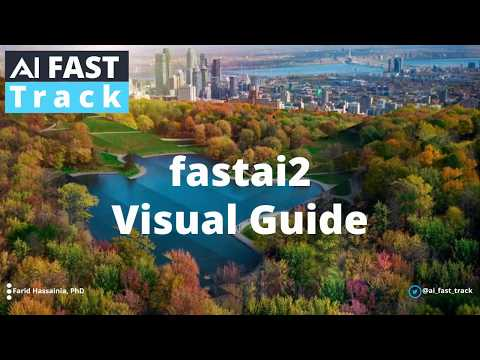

In [1]:
from IPython.display import YouTubeVideo
# Image classification with a single label (Pet Dataset)
# Video credit: AI Fast Track.
YouTubeVideo('yoSUhpETbp8')

![](images/DataBlock-oxford-pet-medium.png)

In [0]:
def label_func(fname):
    return "cat" if fname.name[0].isupper() else "dog"

In [0]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   item_tfms = Resize(224),
                   batch_tfms=aug_transforms())

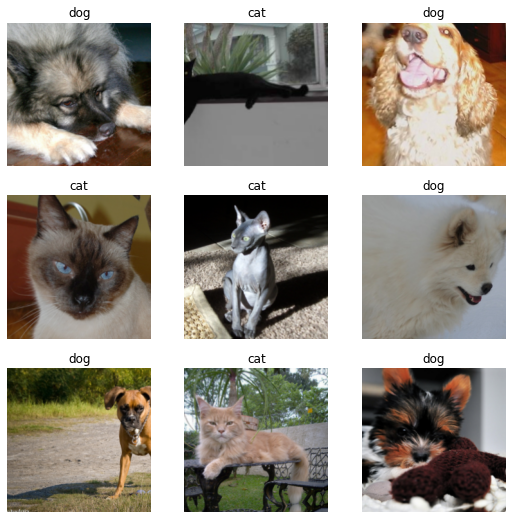

In [13]:
dls = dblock.dataloaders(path/"images")
dls.show_batch()

In [23]:
len(dls.splits[1])

1478

In [14]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.168315,0.022708,0.006766,00:44


epoch,train_loss,valid_loss,error_rate,time
0,0.066347,0.011978,0.004736,00:46


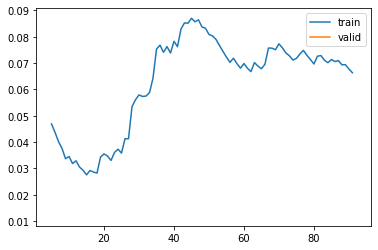

In [15]:
learn.recorder.plot_loss()

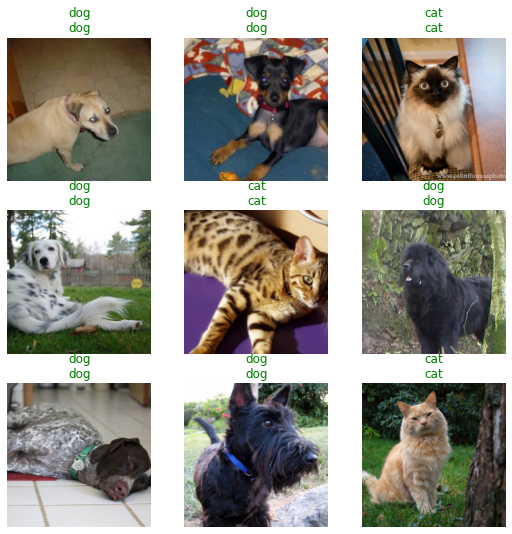

In [16]:
learn.show_results()

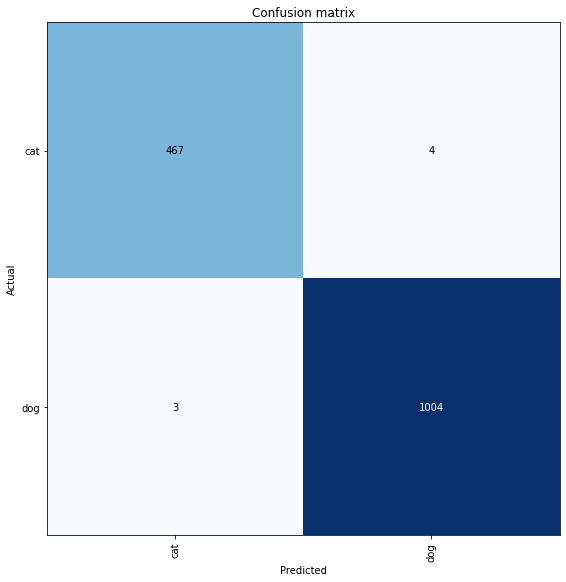

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,8))